In [35]:
xpt_files = ['2015-2016-Demographics_Data.XPT', '2015-2016-Phthalates.XPT', '2015-2016-Parabens.XPT',  '2015-2016-Triclosans.XPT', '2015-2016-Medical-Conditions.XPT']

In [36]:
columns_to_select = {
    '2015-2016-Demographics_Data.XPT' : ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3'],
    '2015-2016-Phthalates.XPT' : ['SEQN', 'URXMEP', 'URXMBP', 'URXMHH', 'URXMHP'],
    '2015-2016-Parabens.XPT' : ['SEQN', 'URXMPB', 'URXPPB', 'URXBUP'],
    '2015-2016-Triclosans.XPT' : ['SEQN', 'URXTRS'],
    '2015-2016-Medical-Conditions.XPT' : ['SEQN', 'MCQ220', 'MCQ230A', 'MCQ230B', 'MCQ230C']
}

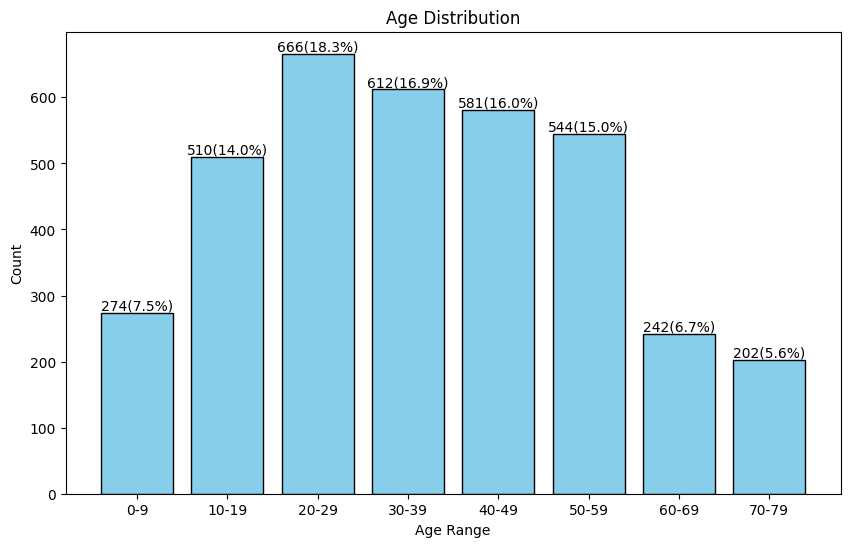

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your Excel file
df = pd.read_excel('2009-2012-Filtered-Data.xlsx')

# Filter age data between 0 and 80
age_data = df['Age'][(df['Age'] >= 0) & (df['Age'] <= 80)]

# Define the age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Plot the bar chart with light blue bars
plt.figure(figsize=(10, 6))
hist, bins_edges, _ = plt.hist(age_data, bins=bins, edgecolor='black', align='mid', rwidth=0.8, color='skyblue')

# Customize the plot
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.grid(False)

# Display count and percentage on bars without space
total = hist.sum()
for i in range(len(hist)):
    count = int(hist[i])
    percent = (hist[i] / total) * 100
    plt.text(bins[i] + 5, hist[i], f'{count}({percent:.1f}%)', ha='center', va='bottom')

# Set custom x-axis labels
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]
plt.xticks([bins[i] + 5 for i in range(len(bins)-1)], labels)

plt.show()


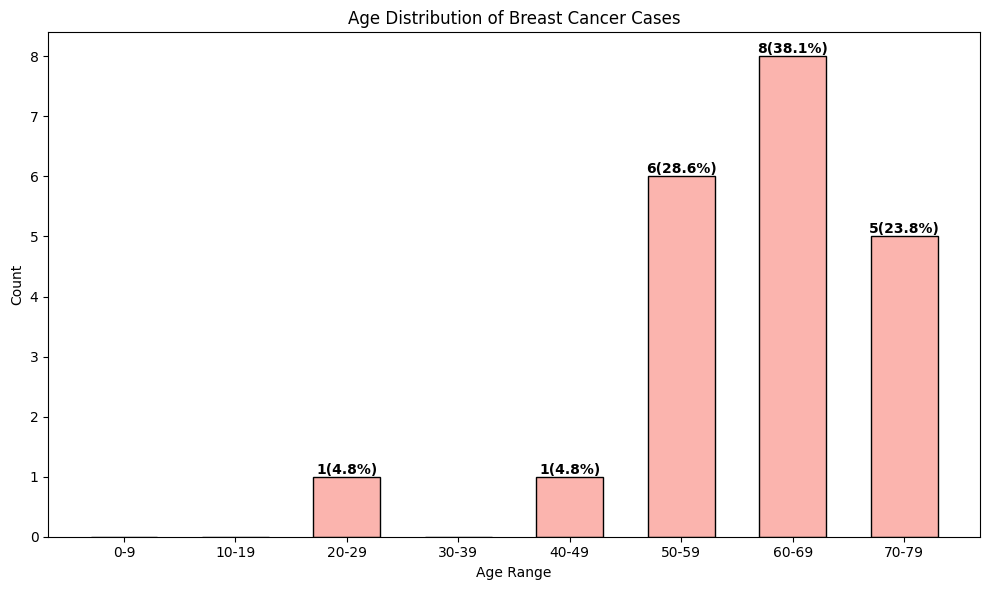

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your Excel file
df = pd.read_excel('2009-2012-Filtered-Data.xlsx')

# Filter records with breast cancer (Cancer code 1)
breast_cancer_data = df[df['Cancer'] == 1]

# Define the age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Plot the bar chart with light pink bars
plt.figure(figsize=(10, 6))
hist, bins_edges, _ = plt.hist(
    breast_cancer_data['Age'],
    bins=bins,
    edgecolor='black',
    align='mid',
    rwidth=0.6,
    color='#FBB4AE'
)

# Total breast cancer cases for percentage calculation
total_cases = sum(hist)

# Customize the plot
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Age Distribution of Breast Cancer Cases')
plt.grid(False)

# Display bold count and percentage only if count > 0
for i in range(len(hist)):
    count = int(hist[i])
    if count > 0:
        percent = (count / total_cases) * 100
        label = f'{count}({percent:.1f}%)'
        plt.text(
            bins[i] + 5, hist[i],
            label,
            ha='center', va='bottom',
            fontweight='bold'  # BOLD text
        )

# Set custom x-axis labels
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]
plt.xticks([bins[i] + 5 for i in range(len(bins)-1)], labels)

plt.tight_layout()
plt.show()


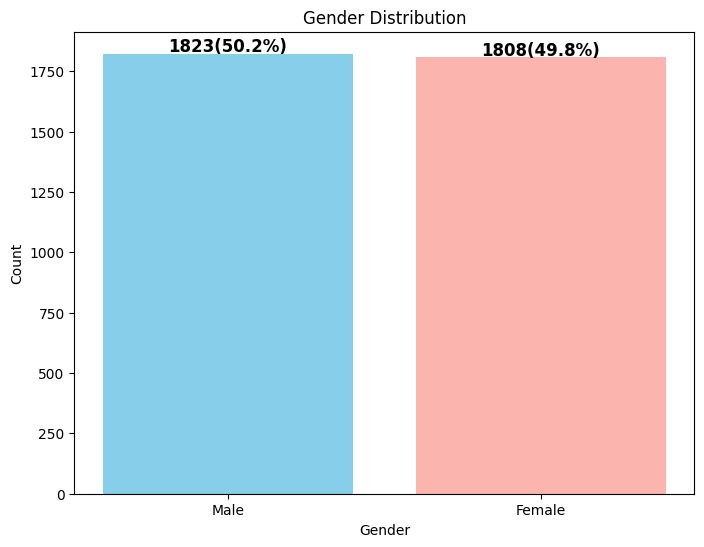

In [112]:
import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(8, 6))

# Get gender counts
gender_counts = df['Gender'].value_counts()
gender_labels = gender_counts.index.map({1: 'Male', 2: 'Female'})
total = gender_counts.sum()

# Create bar plot
bars = plt.bar(gender_labels, gender_counts, color=['skyblue', '#FBB4AE'])

# Add count and percentage labels on top of bars (bold)
for bar in bars:
    count = int(bar.get_height())
    percent = (count / total) * 100
    label = f'{count}({percent:.1f}%)'
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 10,
        label,
        ha='center',
        fontsize=12,
        fontweight='bold'  # Make text bold
    )

# Set titles and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()


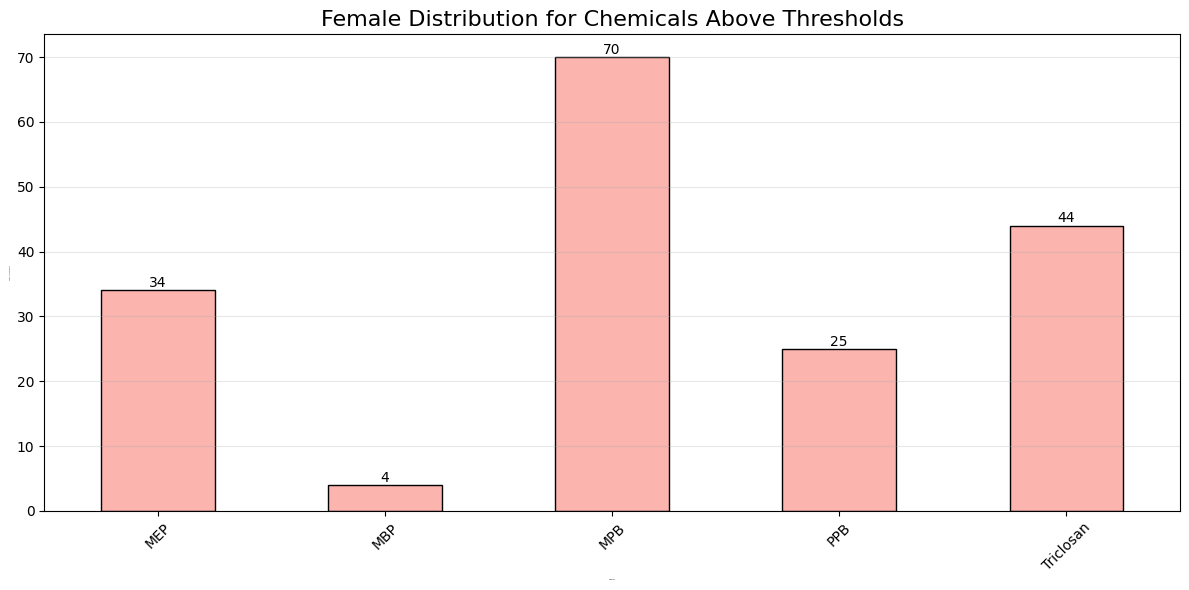

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

# Define chemical thresholds based on updated table
chemical_thresholds = {
    'MEP': 500,      # µg/L
    'MBP': 500,      # µg/L
    'MPB': 500,      # µg/L
    'PPB': 500,      # µg/L
    'Triclosan': 500  # µg/L
}

# Convert all chemical columns to numeric to avoid type errors
for chemical in chemical_thresholds.keys():
    df[chemical] = pd.to_numeric(df[chemical], errors='coerce')  # Convert and handle errors as NaN

# Create new columns indicating whether each chemical exceeds the threshold
for chemical, threshold in chemical_thresholds.items():
    df[f'{chemical}_above_threshold'] = df[chemical] > threshold

# Compute gender distribution for all chemicals above threshold (Only for Female Data)
female_data = df[df['Gender'] == 2]  # Filtering only female data
gender_distribution = pd.DataFrame({
    chemical: female_data[female_data[f'{chemical}_above_threshold']].shape[0]
    for chemical in chemical_thresholds.keys()
}, index=["Female"]).T  # Transpose for bar chart format

# Plot the combined distribution
ax = gender_distribution.plot(kind='bar', figsize=(12, 6), color='#FBB4AE', edgecolor='black', legend=False)

# Customize the plot
plt.title('Female Distribution for Chemicals Above Thresholds', fontsize=16)
plt.xlabel('Chemicals', fontsize=1)
plt.ylabel('Count of Participants', fontsize=1)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Annotate each bar with the count
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only annotate bars with data
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                height + 0.5, 
                f'{int(height)}', 
                ha='center', 
                fontsize=10
            )

plt.tight_layout()
plt.show()

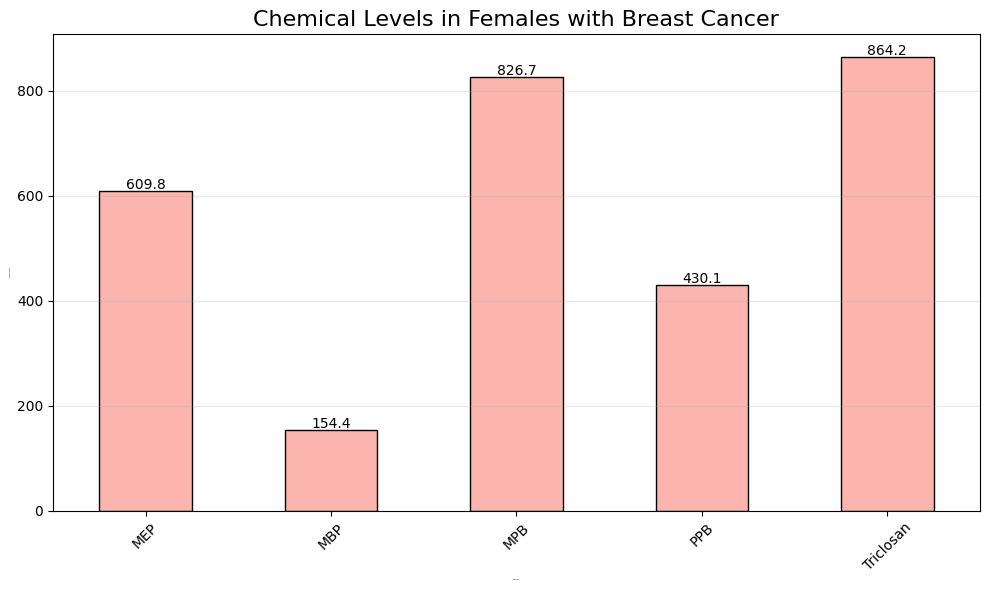

In [88]:
# Filter the data for females with breast cancer (Cancer = 1 and Gender = 2)
breast_cancer_females = df[(df['Cancer'] == 1) & (df['Gender'] == 2)]

# Calculate the average levels of chemicals for this group
chemicals = ['MEP', 'MBP', 'MPB', 'PPB', 'Triclosan']  # Adjust the chemical list as needed
breast_cancer_distribution = breast_cancer_females[chemicals].mean()

# Plot the distribution
plt.figure(figsize=(10, 6))
breast_cancer_distribution.plot(kind='bar', color='#FBB4AE', edgecolor='black')  # Light pink for females
plt.title('Chemical Levels in Females with Breast Cancer', fontsize=16)
plt.xlabel('Chemicals', fontsize=1)
plt.ylabel('Average Levels', fontsize=1)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Annotate each bar with the average level
for index, value in enumerate(breast_cancer_distribution):
    plt.text(index, value + 3, f'{value:.1f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


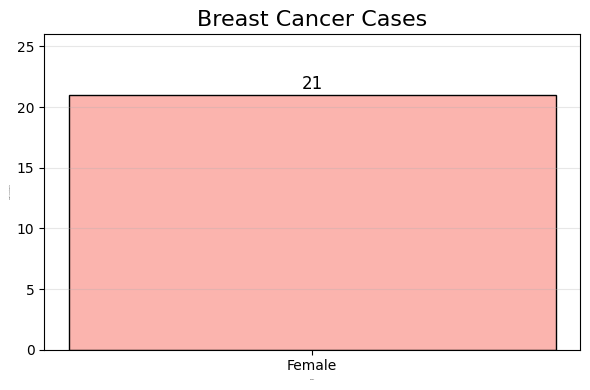

In [89]:
# Filter the data specifically for females with breast cancer (Cancer = 1 and Gender = 2)
female_breast_cancer_data = df[(df['Cancer'] == 1) & (df['Gender'] == 2)]

# Count the occurrences
female_breast_cancer_count = len(female_breast_cancer_data)

# Plot the distribution as a single bar
plt.figure(figsize=(6, 4))
plt.bar(['Female'], [female_breast_cancer_count], color='#FBB4AE', edgecolor='black')
plt.title('Breast Cancer Cases', fontsize=16)
plt.xlabel('Gender', fontsize=1)
plt.ylabel('Count of Participants', fontsize=1)
plt.ylim(0, female_breast_cancer_count + 5)
plt.grid(axis='y', alpha=0.3)

# Annotate the bar with the count
plt.text(0, female_breast_cancer_count + 0.5, str(female_breast_cancer_count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


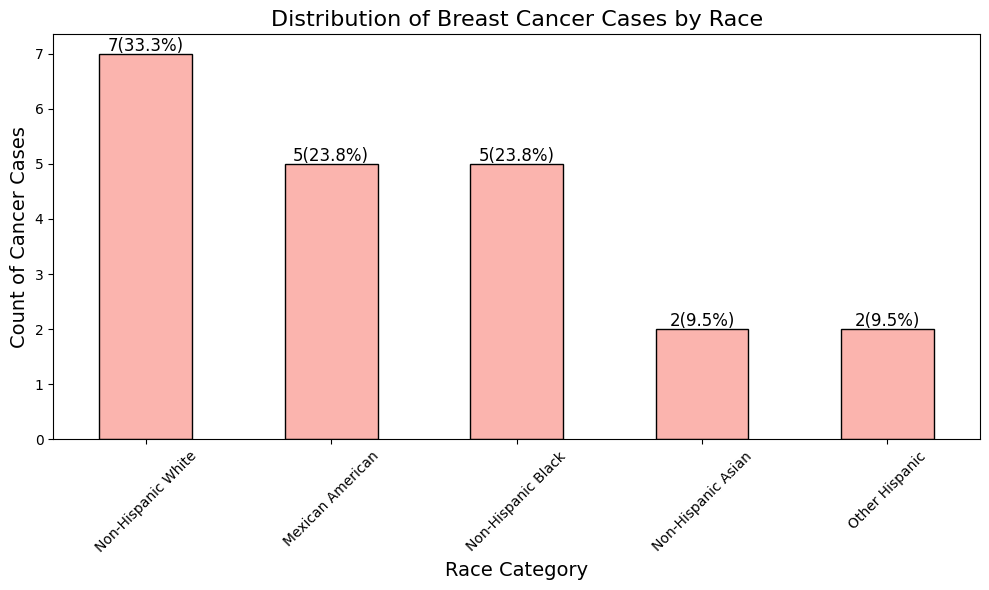

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_excel("2009-2012-Filtered-Data.xlsx")

# Define race code mappings
race_mapping = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    5: "Non-Hispanic Asian",
    6: "Other Race - Including Multi-Racial"
}

# Map Race codes to readable labels
df["Race"] = df["Race"].map(race_mapping)

# Filter rows where Cancer = 1 (breast cancer cases)
breast_cancer_cases = df[df["Cancer"] == 1]

# Count breast cancer cases by race
race_cancer_counts = breast_cancer_cases["Race"].value_counts()
total_cases = race_cancer_counts.sum()

# Plotting
plt.figure(figsize=(10, 6))
bars = race_cancer_counts.plot(kind='bar', color='#FBB4AE', edgecolor='black')

# Customize plot
plt.title("Distribution of Breast Cancer Cases by Race", fontsize=16)
plt.xlabel("Race Category", fontsize=14)             # X-axis label
plt.ylabel("Count of Cancer Cases", fontsize=14)     # Y-axis label
plt.xticks(rotation=45)

# Add count + percentage labels on top of bars
for bar in bars.patches:
    height = bar.get_height()
    percent = (height / total_cases) * 100
    label = f'{int(height)}({percent:.1f}%)'
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05, label, ha='center', fontsize=12)

plt.tight_layout()
plt.show()


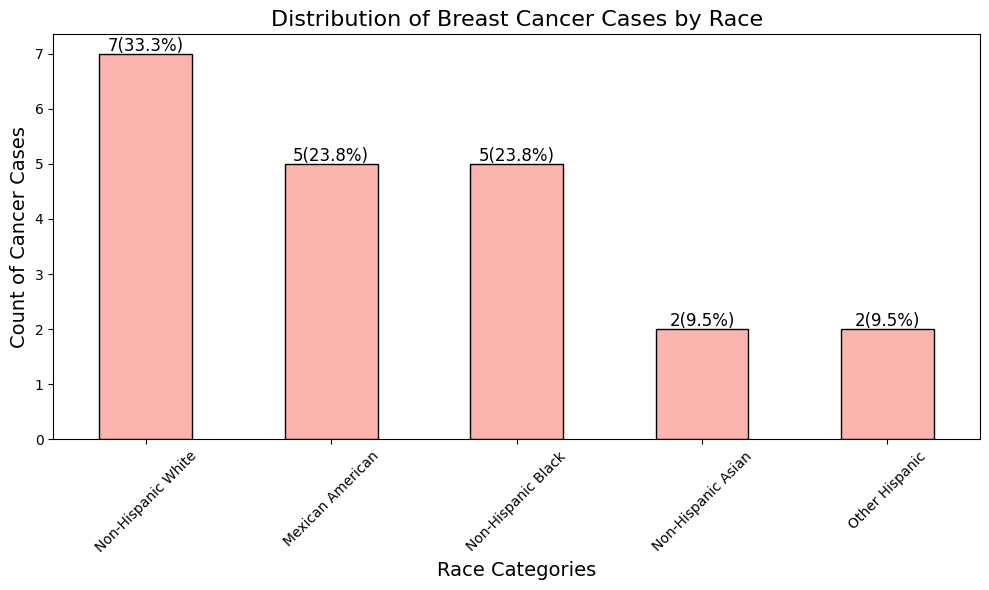

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_excel("2009-2012-Filtered-Data.xlsx")

# Define race code mappings
race_mapping = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    5: "Non-Hispanic Asian",
    6: "Other Race - Including Multi-Racial"
}

# Map Race codes to readable labels
df["Race"] = df["Race"].map(race_mapping)

# Filter rows where Cancer = 1 (breast cancer cases)
breast_cancer_cases = df[df["Cancer"] == 1]

# Count breast cancer cases by race
race_cancer_counts = breast_cancer_cases["Race"].value_counts()
total_cases = race_cancer_counts.sum()

# Plotting
plt.figure(figsize=(10, 6))
bars = race_cancer_counts.plot(kind='bar', color='#FBB4AE', edgecolor='black')

# Customize plot
plt.title("Distribution of Breast Cancer Cases by Race", fontsize=16)
plt.xlabel("Race Categories", fontsize=14)
plt.ylabel("Count of Cancer Cases", fontsize=14)
plt.xticks(rotation=45)

# Add count + percentage labels on top of bars
for bar in bars.patches:
    height = bar.get_height()
    percent = (height / total_cases) * 100
    label = f'{int(height)}({percent:.1f}%)'
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05, label, ha='center', fontsize=12)

plt.tight_layout()
plt.show()


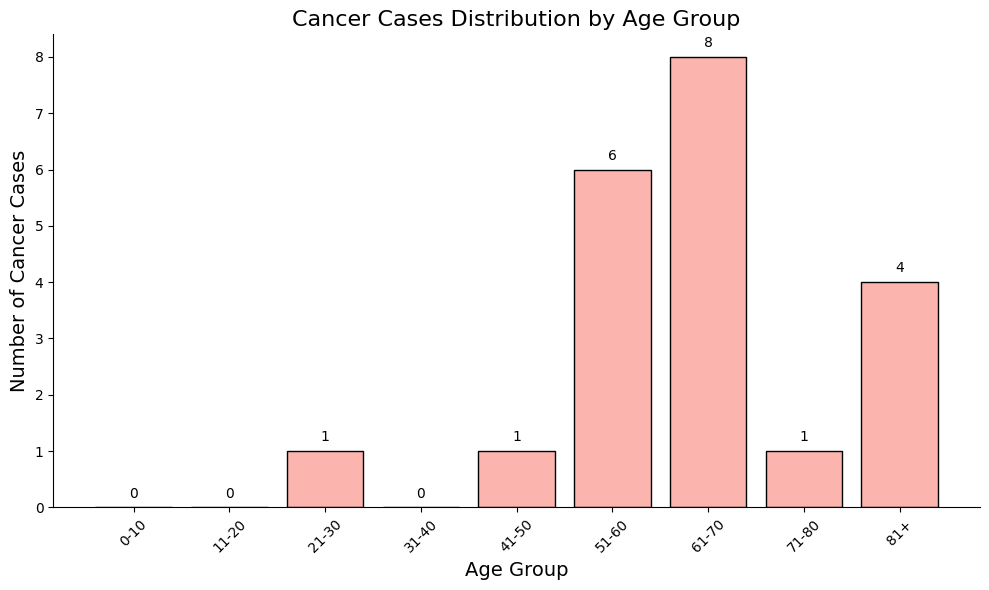

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("2009-2012-Filtered-Data.xlsx")

# Create Age Group
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count cancer cases in each age group
cancer_counts = df[df['Cancer'] == 1]['Age_Group'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(cancer_counts.index, cancer_counts.values, color="#FBB4AE", edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Offset text slightly above the bar
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

# Titles and Labels
plt.title("Cancer Cases Distribution by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Number of Cancer Cases", fontsize=14)
plt.xticks(rotation=45)
sns.despine()  # Clean style, no top/right lines
plt.tight_layout()
plt.show()


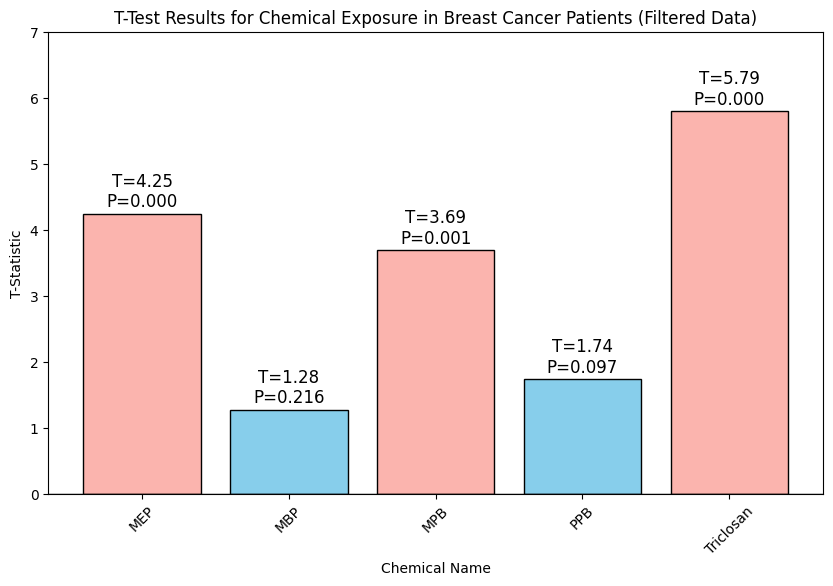

In [92]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the newly filtered dataset
file_path = "2009-2012-Filtered-Data.xlsx"
df = pd.read_excel(file_path)

# Filter breast cancer patients (Cancer = 1) and non-cancer individuals (Cancer = 1)
cancer_group = df[df["Cancer"] == 1]
non_cancer_group = df[df["Cancer"] == 0]

# List of chemical exposure variables
chemicals = ["MEP", "MBP", "MPB", "PPB", "Triclosan"]

# Perform t-test for each chemical and store results
t_test_results = []

for chem in chemicals:
    t_stat, p_value = stats.ttest_ind(cancer_group[chem], non_cancer_group[chem], nan_policy='omit', equal_var=False)
    t_test_results.append({"Chemical": chem, "T-Statistic": t_stat, "P-Value": p_value})

# Convert results to a DataFrame
t_test_df = pd.DataFrame(t_test_results)

# Plot T-test results
plt.figure(figsize=(10, 6))
colors = ['#FBB4AE' if p < 0.05 else 'skyblue' for p in t_test_df["P-Value"]]

# Bar chart of T-statistics
plt.bar(t_test_df["Chemical"], t_test_df["T-Statistic"], color=colors, edgecolor="black")

# Annotate each bar with T-statistic and P-value
for i, (t_stat, p_val) in enumerate(zip(t_test_df["T-Statistic"], t_test_df["P-Value"])):
    plt.text(i, t_stat + 0.1, f"T={t_stat:.2f}\nP={p_val:.3f}", ha='center', fontsize=12)

# Add labels and title
plt.axhline(y=0, color='black', linewidth=1)
plt.xlabel("Chemical Name") 
plt.ylabel("T-Statistic")
plt.title("T-Test Results for Chemical Exposure in Breast Cancer Patients (Filtered Data)")
plt.xticks(rotation=45)
plt.ylim(0, 7)
plt.show()



Confusion Matrix:
[[708  15]
 [  0   4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       723
           1       0.21      1.00      0.35         4

    accuracy                           0.98       727
   macro avg       0.61      0.99      0.67       727
weighted avg       1.00      0.98      0.99       727



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:54:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


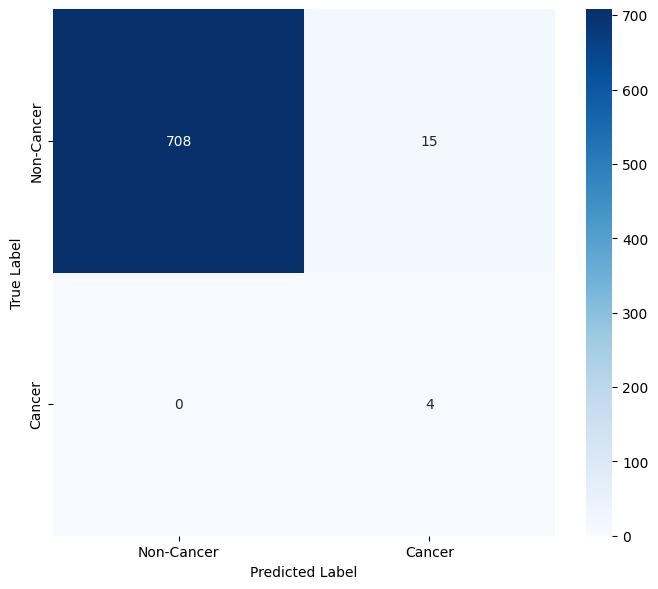


Missed Cancer Cases: 0 out of 4
Empty DataFrame
Columns: [MEP, MBP, MPB, PPB, Triclosan, Age, Gender, Triclosan_Age, MPB_per_Age, Total_Phthalates, Total_Parabens]
Index: []


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load and preprocess data
df = pd.read_excel("2009-2012-Filtered-Data.xlsx")

# Create engineered features
df["Triclosan_Age"] = df["Triclosan"] * df["Age"]
df["MPB_per_Age"] = df["MPB"] / (df["Age"] + 1e-6)
df["Total_Phthalates"] = df["MEP"] + df["MBP"] 
df["Total_Parabens"] = df["MPB"] + df["PPB"]

# Define features and target
predictors = ["MEP", "MBP", "MPB", "PPB", "Triclosan", "Age", "Gender",
              "Triclosan_Age", "MPB_per_Age", "Total_Phthalates", "Total_Parabens"]
target = "Cancer"

df_model = df.dropna(subset=predictors + [target])
X = df_model[predictors]
y = df_model[target]

# Create a different 80/20 stratified split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)
for train_idx, test_idx in splitter.split(X, y):
    X_train_alt, X_test_alt = X.iloc[train_idx], X.iloc[test_idx]
    y_train_alt, y_test_alt = y.iloc[train_idx], y.iloc[test_idx]

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled_alt, y_train_resampled_alt = smote.fit_resample(X_train_alt, y_train_alt)

# Train XGBoost model
xgb_model_alt = XGBClassifier(
    n_estimators=150,
    learning_rate=0.03,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model_alt.fit(X_train_resampled_alt, y_train_resampled_alt)

# Predict on new test set
y_proba_alt = xgb_model_alt.predict_proba(X_test_alt)[:, 1]
threshold = 0.4
y_pred_alt = (y_proba_alt >= threshold).astype(int)

# Print evaluation
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_alt, y_pred_alt)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test_alt, y_pred_alt))

# Plot confusion matrix
def plot_conf_matrix(cm, model_name, threshold):
    acc = accuracy_score(y_test_alt, y_pred_alt)
    prec = precision_score(y_test_alt, y_pred_alt, zero_division=0)
    rec = recall_score(y_test_alt, y_pred_alt, zero_division=0)

    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-Cancer", "Cancer"],
                yticklabels=["Non-Cancer", "Cancer"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    plt.tight_layout()
    plt.show()

plot_conf_matrix(cm, "XGBoost", threshold)

# Print missed cancer cases
missed = (y_test_alt == 1) & (y_pred_alt == 0)
print(f"\nMissed Cancer Cases: {missed.sum()} out of {y_test_alt.sum()}")
print(X_test_alt[missed])


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:45:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


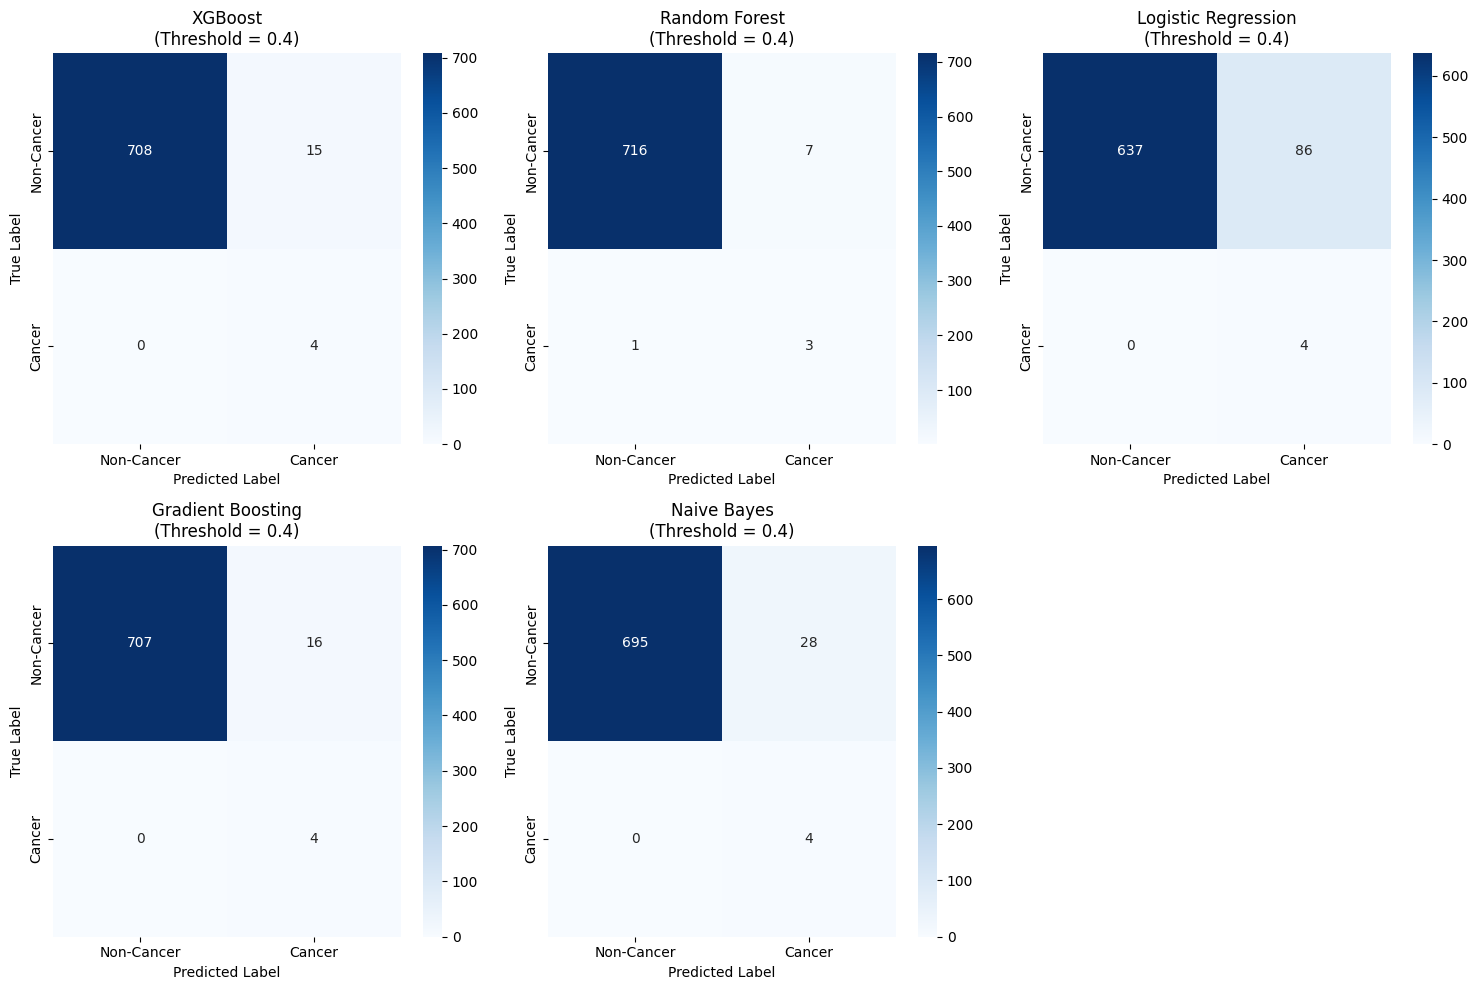


Model Comparison Results:
                 Model  Accuracy  Precision  Recall  TP  FN  FP   TN
0              XGBoost  0.979367   0.210526    1.00   4   0  15  708
2  Logistic Regression  0.881706   0.044444    1.00   4   0  86  637
3    Gradient Boosting  0.977992   0.200000    1.00   4   0  16  707
4          Naive Bayes  0.961486   0.125000    1.00   4   0  28  695
1        Random Forest  0.988996   0.300000    0.75   3   1   7  716


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_excel("2009-2012-Filtered-Data.xlsx")

# Feature engineering
df["Triclosan_Age"] = df["Triclosan"] * df["Age"]
df["MPB_per_Age"] = df["MPB"] / (df["Age"] + 1e-6)
df["Total_Phthalates"] = df["MEP"] + df["MBP"]
df["Total_Parabens"] = df["MPB"] + df["PPB"]

predictors = ["MEP", "MBP", "MPB", "PPB", "Triclosan", "Age", "Gender",
              "Triclosan_Age", "MPB_per_Age", "Total_Phthalates", "Total_Parabens"]
target = "Cancer"

df_model = df.dropna(subset=predictors + [target])
X = df_model[predictors]
y = df_model[target]

# Stratified split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)
for train_idx, test_idx in splitter.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Models to compare
models = {
    "XGBoost": XGBClassifier(n_estimators=150, learning_rate=0.03, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Collect confusion matrices
conf_matrices = {}
results = []
threshold = 0.4

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    y_pred = (y_proba >= threshold).astype(int)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "TP": cm[1, 1],
        "FN": cm[1, 0],
        "FP": cm[0, 1],
        "TN": cm[0, 0]
    })

    conf_matrices[name] = cm

# Plot all confusion matrices in a grid
n_models = len(models)
cols = 3
rows = int(np.ceil(n_models / cols))

plt.figure(figsize=(cols * 5, rows * 5))

for idx, (name, cm) in enumerate(conf_matrices.items(), 1):
    plt.subplot(rows, cols, idx)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-Cancer", "Cancer"],
                yticklabels=["Non-Cancer", "Cancer"])
    plt.title(f"{name}\n(Threshold = {threshold})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()

# Show results table
results_df = pd.DataFrame(results).sort_values(by="Recall", ascending=False)
print("\nModel Comparison Results:")
print(results_df)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:57:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


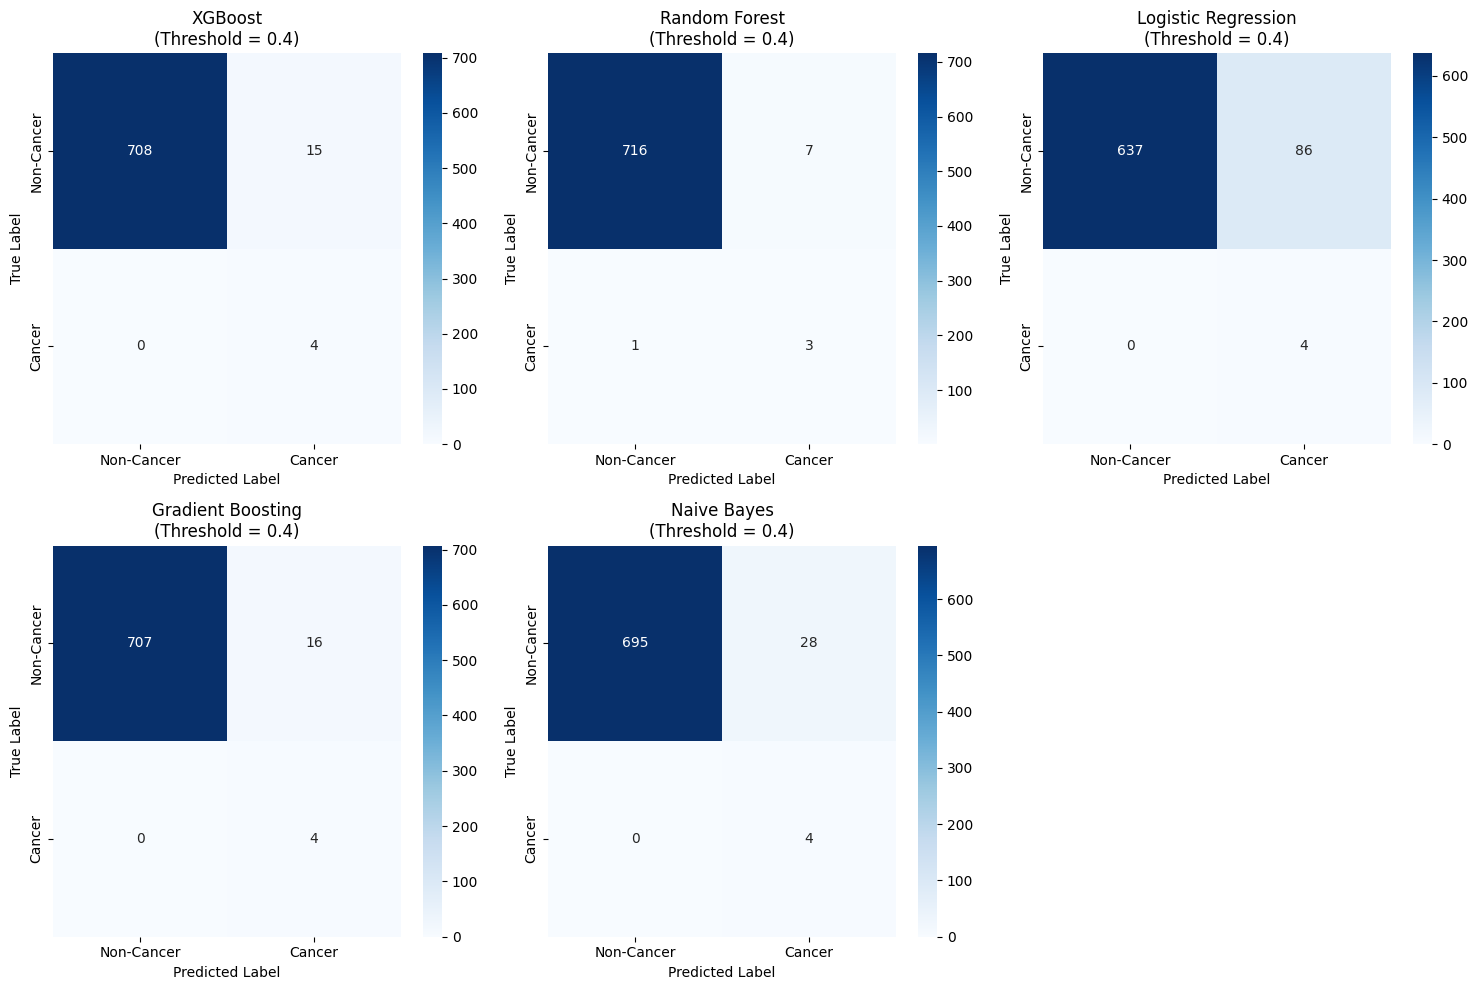

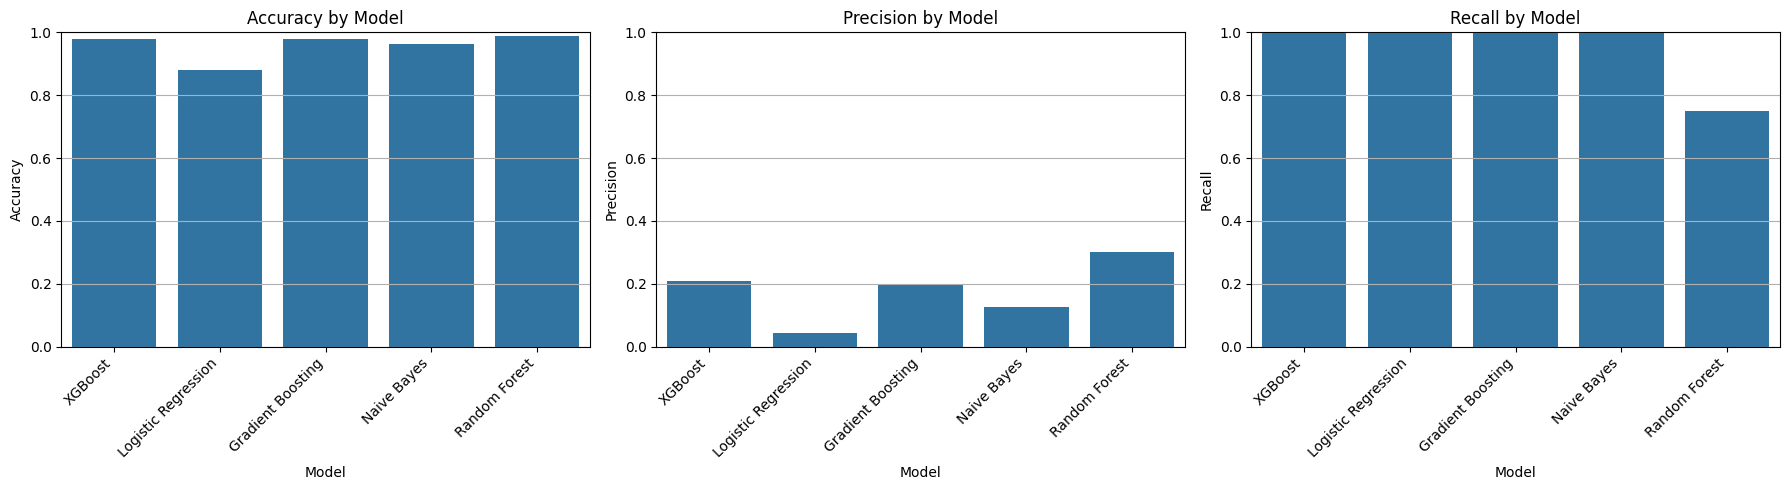


Model Comparison Results:
                 Model  Accuracy  Precision  Recall  TP  FN  FP   TN
0              XGBoost  0.979367   0.210526    1.00   4   0  15  708
2  Logistic Regression  0.881706   0.044444    1.00   4   0  86  637
3    Gradient Boosting  0.977992   0.200000    1.00   4   0  16  707
4          Naive Bayes  0.961486   0.125000    1.00   4   0  28  695
1        Random Forest  0.988996   0.300000    0.75   3   1   7  716


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_excel("2009-2012-Filtered-Data.xlsx")

# Feature engineering
df["Triclosan_Age"] = df["Triclosan"] * df["Age"]
df["MPB_per_Age"] = df["MPB"] / (df["Age"] + 1e-6)
df["Total_Phthalates"] = df["MEP"] + df["MBP"]
df["Total_Parabens"] = df["MPB"] + df["PPB"]

predictors = ["MEP", "MBP", "MPB", "PPB", "Triclosan", "Age", "Gender",
              "Triclosan_Age", "MPB_per_Age", "Total_Phthalates", "Total_Parabens"]
target = "Cancer"

df_model = df.dropna(subset=predictors + [target])
X = df_model[predictors]
y = df_model[target]

# Stratified split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)
for train_idx, test_idx in splitter.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Models to compare
models = {
    "XGBoost": XGBClassifier(n_estimators=150, learning_rate=0.03, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Collect confusion matrices
conf_matrices = {}
results = []
threshold = 0.4

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    y_pred = (y_proba >= threshold).astype(int)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "TP": cm[1, 1],
        "FN": cm[1, 0],
        "FP": cm[0, 1],
        "TN": cm[0, 0]
    })

    conf_matrices[name] = cm

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Recall", ascending=False)

# ---------------- Plot Section ----------------

# Plot all confusion matrices in a grid
n_models = len(models)
cols = 3
rows = int(np.ceil(n_models / cols))

plt.figure(figsize=(cols * 5, rows * 5))

for idx, (name, cm) in enumerate(conf_matrices.items(), 1):
    plt.subplot(rows, cols, idx)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-Cancer", "Cancer"],
                yticklabels=["Non-Cancer", "Cancer"])
    plt.title(f"{name}\n(Threshold = {threshold})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()

# ---------------- New: Metrics Bar Plots ----------------

# Bar plots for Accuracy, Precision, Recall
metrics = ["Accuracy", "Precision", "Recall"]

plt.figure(figsize=(18, 5))

for idx, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, idx)
    sns.barplot(data=results_df, x="Model", y=metric)
    plt.title(f"{metric} by Model")
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, 1)  # Because these are proportions (0 to 1)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

# ---------------- Print Results ----------------

print("\nModel Comparison Results:")
print(results_df)


         Current function value: 0.187692
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Cancer   No. Observations:                 5774
Model:                          Logit   Df Residuals:                     5762
Method:                           MLE   Df Model:                           11
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                  0.7292
Time:                        17:48:14   Log-Likelihood:                -1083.7
converged:                      False   LL-Null:                       -4002.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -56.1324    404.559     -0.139      0.890    -849.053     736.788
MEP                  0.0050   9757.679   5.13e-

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


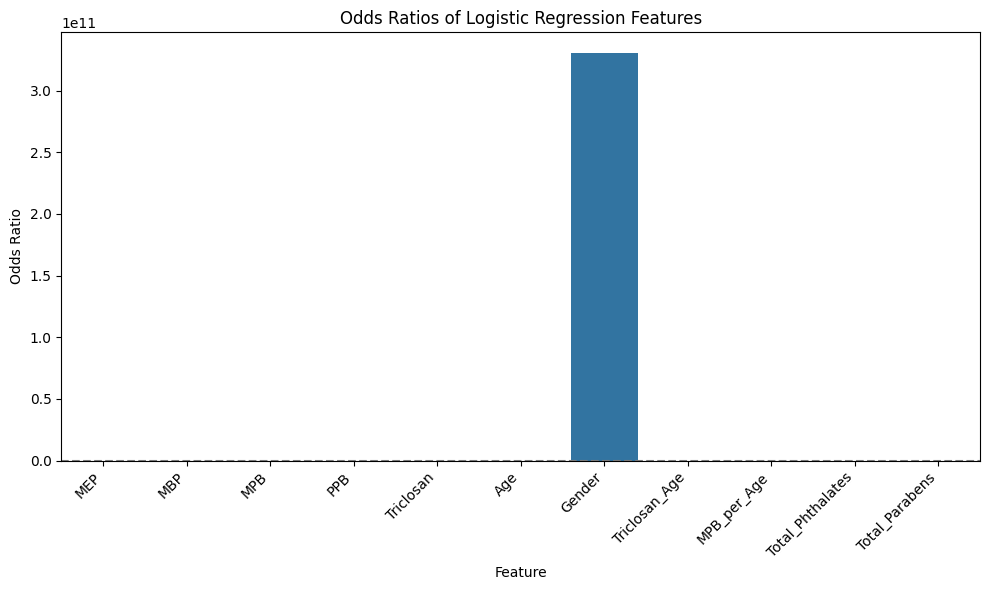


INTERPRETATION NOTES:
- MEP: increases odds of cancer (not statistically significant, OR=1.005)
- MBP: decreases odds of cancer (not statistically significant, OR=0.9947)
- MPB: increases odds of cancer (not statistically significant, OR=1.0041)
- PPB: decreases odds of cancer (not statistically significant, OR=0.9996)
- Triclosan: decreases odds of cancer (statistically significant, OR=0.9907)
- Age: increases odds of cancer (statistically significant, OR=1.051)
- Gender: increases odds of cancer (not statistically significant, OR=330689047818.7776)
- Triclosan_Age: increases odds of cancer (statistically significant, OR=1.0003)
- MPB_per_Age: decreases odds of cancer (statistically significant, OR=0.6683)
- Total_Phthalates: decreases odds of cancer (not statistically significant, OR=0.9994)
- Total_Parabens: increases odds of cancer (not statistically significant, OR=1.0005)

Classification Report (Logistic Regression with Threshold = 0.4):
              precision    recall  f1-sco

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [93]:
import statsmodels.api as sm

# Add constant term for intercept
X_const = sm.add_constant(X_train_resampled)

# Fit logistic regression using statsmodels
logit_model = sm.Logit(y_train_resampled, X_const)
result = logit_model.fit()

# ----------------- Print Summary Table -----------------
print(result.summary())

# ----------------- Extract Coefficients -----------------
coef_df = pd.DataFrame({
    "Feature": result.params.index,
    "Coefficient": result.params.values,
    "P-Value": result.pvalues.values,
    "Odds Ratio": np.exp(result.params.values)
}).round(4)

# ----------------- Plot Coefficients -----------------
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.iloc[1:], x="Feature", y="Odds Ratio")  # skip constant
plt.axhline(1, color='gray', linestyle='--')
plt.xticks(rotation=45, ha="right")
plt.title("Odds Ratios of Logistic Regression Features")
plt.tight_layout()
plt.show()

# ----------------- Interpretation Notes -----------------
print("\nINTERPRETATION NOTES:")
for _, row in coef_df.iterrows():
    if row["P-Value"] < 0.05:
        significance = "statistically significant"
    else:
        significance = "not statistically significant"
    direction = "increases" if row["Odds Ratio"] > 1 else "decreases"
    if row["Feature"] != "const":
        print(f"- {row['Feature']}: {direction} odds of cancer ({significance}, OR={row['Odds Ratio']})")

# ----------------- Predict & Evaluate -----------------
X_test_const = sm.add_constant(X_test)
y_pred_prob = result.predict(X_test_const)
y_pred_lr = (y_pred_prob >= threshold).astype(int)

print("\nClassification Report (Logistic Regression with Threshold = 0.4):")
print(classification_report(y_test, y_pred_lr, target_names=["Non-Cancer", "Cancer"]))


Optimization terminated successfully.
         Current function value: 0.027430
         Iterations 11

===== Logistic Regression Summary (Females Only) =====
                           Logit Regression Results                           
Dep. Variable:                 Cancer   No. Observations:                 1808
Model:                          Logit   Df Residuals:                     1803
Method:                           MLE   Df Model:                            4
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                  0.5666
Time:                        19:54:28   Log-Likelihood:                -49.594
converged:                       True   LL-Null:                       -114.44
Covariance Type:            nonrobust   LLR p-value:                 4.522e-27
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.6476      1.651     -5.84

/var/folders/cm/crjvkkn92w5dgbv_cnf7vq0m0000gn/T/ipykernel_75861/4121743608.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df[coef_df["Feature"] != "const"], x="Feature", y="Odds Ratio", palette="pastel")


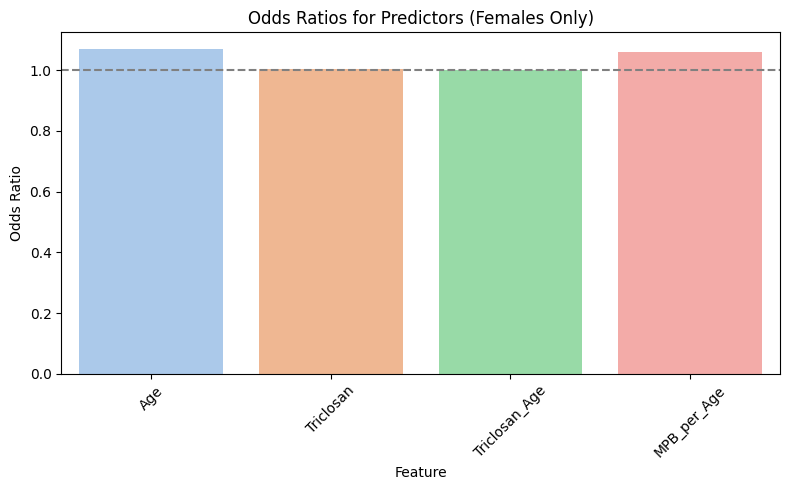

In [95]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel("2009-2012-Filtered-Data.xlsx")

# Filter to only female participants
df = df[df["Gender"] == 2]

# Create relevant features
df["Triclosan_Age"] = df["Triclosan"] * df["Age"]
df["MPB_per_Age"] = df["MPB"] / (df["Age"] + 1e-6)

# Define predictors and target
features = ["Age", "Triclosan", "Triclosan_Age", "MPB_per_Age"]
target = "Cancer"

# Drop rows with missing values
df_clean = df.dropna(subset=features + [target])
X = df_clean[features]
y = df_clean[target]

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X_const)
result = model.fit()

# Show summary
print("\n===== Logistic Regression Summary (Females Only) =====")
print(result.summary())

# Create readable summary table
coef_df = pd.DataFrame({
    "Feature": result.params.index,
    "Coefficient": result.params.values,
    "Odds Ratio": np.exp(result.params.values),
    "P-Value": result.pvalues
}).round(4)

# Simplified interpretation
print("\n===== Simplified Interpretation =====")
for _, row in coef_df.iterrows():
    if row["Feature"] == "const":
        continue
    significance = "significant" if row["P-Value"] < 0.05 else "not significant"
    effect = "increases" if row["Odds Ratio"] > 1 else "decreases"
    print(f"- {row['Feature']} {effect} the odds of cancer ({significance}, OR={row['Odds Ratio']})")

# Plot odds ratios
plt.figure(figsize=(8, 5))
sns.barplot(data=coef_df[coef_df["Feature"] != "const"], x="Feature", y="Odds Ratio", palette="pastel")
plt.axhline(1, color="gray", linestyle="--")
plt.title("Odds Ratios for Predictors (Females Only)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


         Current function value: 0.023862
         Iterations: 35

===== Logistic Regression Summary (All Features, Females Only) =====
                           Logit Regression Results                           
Dep. Variable:                 Cancer   No. Observations:                 1808
Model:                          Logit   Df Residuals:                     1797
Method:                           MLE   Df Model:                           10
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                  0.6230
Time:                        19:57:49   Log-Likelihood:                -43.143
converged:                      False   LL-Null:                       -114.44
Covariance Type:            nonrobust   LLR p-value:                 1.236e-25
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -9.3549      1.952     -4.792      0.000  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/cm/crjvkkn92w5dgbv_cnf7vq0m0000gn/T/ipykernel_75861/1947625706.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df[coef_df["Feature"] != "const"], x="Feature", y="Odds Ratio", palette="pastel")


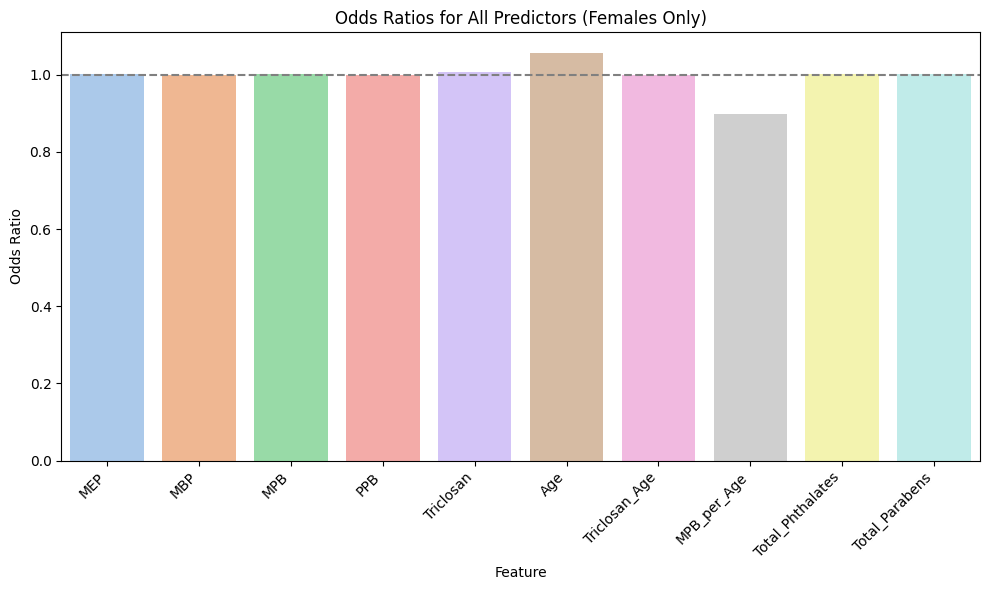

In [96]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("2009-2012-Filtered-Data.xlsx")

# Filter to only female participants
df = df[df["Gender"] == 2]

# Create new derived features
df["Triclosan_Age"] = df["Triclosan"] * df["Age"]
df["MPB_per_Age"] = df["MPB"] / (df["Age"] + 1e-6)
df["Total_Phthalates"] = df["MEP"] + df["MBP"]
df["Total_Parabens"] = df["MPB"] + df["PPB"]

# Define predictors and target
features = ["MEP", "MBP", "MPB", "PPB", "Triclosan", "Age",
            "Triclosan_Age", "MPB_per_Age", "Total_Phthalates", "Total_Parabens"]
target = "Cancer"

# Drop rows with missing values
df_clean = df.dropna(subset=features + [target])
X = df_clean[features]
y = df_clean[target]

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit logistic regression
model = sm.Logit(y, X_const)
result = model.fit()

# Print regression summary
print("\n===== Logistic Regression Summary (All Features, Females Only) =====")
print(result.summary())

# Build coefficient table
coef_df = pd.DataFrame({
    "Feature": result.params.index,
    "Coefficient": result.params.values,
    "Odds Ratio": np.exp(result.params.values),
    "P-Value": result.pvalues
}).round(4)

# Print simplified interpretations
print("\n===== Simplified Interpretation =====")
for _, row in coef_df.iterrows():
    if row["Feature"] == "const":
        continue
    significance = "significant" if row["P-Value"] < 0.05 else "not significant"
    effect = "increases" if row["Odds Ratio"] > 1 else "decreases"
    print(f"- {row['Feature']} {effect} the odds of cancer ({significance}, OR={row['Odds Ratio']})")

# Plot odds ratios
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df[coef_df["Feature"] != "const"], x="Feature", y="Odds Ratio", palette="pastel")
plt.axhline(1, color='gray', linestyle='--')
plt.title("Odds Ratios for All Predictors (Females Only)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Optimization terminated successfully.
         Current function value: 0.027433
         Iterations 11

===== Logistic Regression Summary (Optimized, Females Only) =====
                           Logit Regression Results                           
Dep. Variable:                 Cancer   No. Observations:                 1808
Model:                          Logit   Df Residuals:                     1804
Method:                           MLE   Df Model:                            3
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                  0.5666
Time:                        20:04:49   Log-Likelihood:                -49.599
converged:                       True   LL-Null:                       -114.44
Covariance Type:            nonrobust   LLR p-value:                 6.321e-28
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.4476      0.589    -

/var/folders/cm/crjvkkn92w5dgbv_cnf7vq0m0000gn/T/ipykernel_75861/3022646272.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df[coef_df["Feature"] != "const"], x="Feature", y="Odds Ratio", palette="Set2")


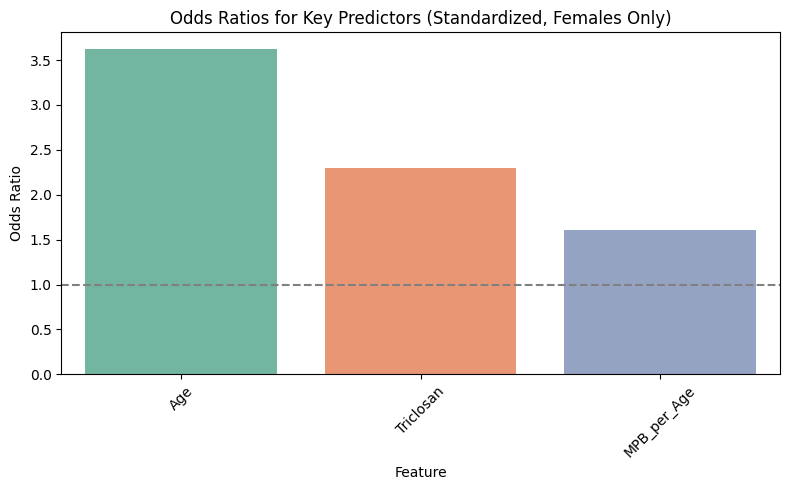

In [99]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("2009-2012-Filtered-Data.xlsx")

# Step 1: Filter to females only
df = df[df["Gender"] == 2]

# Step 2: Create engineered feature
df["MPB_per_Age"] = df["MPB"] / (df["Age"] + 1e-6)

# Step 3: Select features and target
features = ["Age", "Triclosan", "MPB_per_Age"]
target = "Cancer"

# Step 4: Drop missing values
df_clean = df.dropna(subset=features + [target])
X = df_clean[features]
y = df_clean[target]

# Step 5: Standardize features (and preserve index)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features, index=X.index)

# Step 6: Add constant for intercept
X_scaled_const = sm.add_constant(X_scaled)

# Step 7: Fit logistic regression
model = sm.Logit(y, X_scaled_const)
result = model.fit()

# Step 8: Print full summary
print("\n===== Logistic Regression Summary (Optimized, Females Only) =====")
print(result.summary())

# Step 9: Create and print odds ratio table
coef_df = pd.DataFrame({
    "Feature": result.params.index,
    "Coefficient": result.params.values,
    "Odds Ratio": np.exp(result.params.values),
    "P-Value": result.pvalues
}).round(4)

print("\n===== Simplified Interpretation =====")
for _, row in coef_df.iterrows():
    if row["Feature"] == "const":
        continue
    significance = "significant" if row["P-Value"] < 0.05 else "not significant"
    effect = "increases" if row["Odds Ratio"] > 1 else "decreases"
    print(f"- {row['Feature']} {effect} the odds of cancer ({significance}, OR={row['Odds Ratio']})")

# Step 10: Plot odds ratios
plt.figure(figsize=(8, 5))
sns.barplot(data=coef_df[coef_df["Feature"] != "const"], x="Feature", y="Odds Ratio", palette="Set2")
plt.axhline(1, color='gray', linestyle='--')
plt.title("Odds Ratios for Key Predictors (Standardized, Females Only)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
